# Axes

[Nino-hist](https://nino-hist.site) provides powerful axes extension for [boost-histogram](https://boost-histogram.readthedocs.io/en/latest). New features include name and title properties, Bool type axis, filling histogram by names. Let's see what's new in [Nino-hist](https://nino-hist.site) axes.

## Name

[Nino-hist](https://nino-hist.site) supports customized names for the axes. You can create personalized axes for your histogram like this: `hist.axis.Regular(name='myRegular')`. The idea is this (and is [taken](https://github.com/CoffeaTeam/coffea/tree/master/coffea/hist) directly from the [Coffea](https://github.com/CoffeaTeam/coffea) project): All axes have
a *required* name. These names are used (and generally required) throughout the interface.

Name is the identifier of an axis, which means that you can access this `Axis` object by name, but two axes cannot have the same name. Note that the named axes can only be created in `NamedHist` histogram. For a `NamedHist` instance, you can fill it by providing the value list, but you need to specify the assignment objects by their names. Let's see how to give a histogram a name and fill it according to names!

Supposed that you have installed [Nino-hist](https://nino-hist.site), you can created a `NamedHist` object like this. If you want to change the hist packaging path (for example, using as sub-project), you can go to the `setup.cfg` and modify `[options.packages.find]` in it. Initialize it using a `Regular` axis and an `Integer` axis.

In [1]:
import hist

h = hist.NamedHist(
    hist.axis.Regular(10, 0, 1, name='myRegular'),
    hist.axis.Integer(-1, 1, name='myInteger')
)

regular = [.15, .15, .25, .35, .55, .55]
integer = [-1, -1, 0, 0, 0, 0]

Then we can fill the `h` using the names of its axes.

In [2]:
h.fill(myRegular=regular, myInteger=integer)

NamedHist(
  Regular(10, 0, 1, metadata={'name': 'myRegular', 'title': None}),
  Integer(-1, 1, metadata={'name': 'myInteger', 'title': None}),
  storage=Double()) # Sum: 6.0

See what's print off contains `# Sum: 6.0`, which implies that 6 values are filled in `h`, i.e., (.15, -1), (.15, -1), (.25, 0), (.35, 0), (.55, 0), (.55, 0). Then verify them!

In [3]:
h.view()

array([[0., 0.],
       [2., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 2.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

See? The correspoding bins are filled. Let's visualize `h` to get more intuitive.

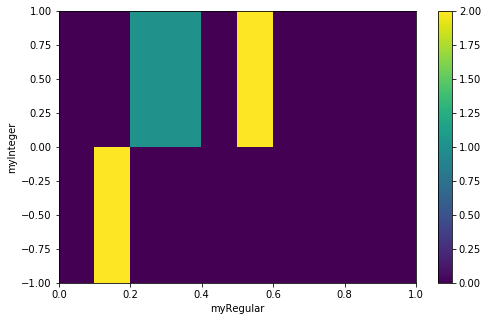

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))
w, x, y = h.to_numpy()
mesh = ax.pcolormesh(x, y, w.T)
ax.set_xlabel(h.axes[0].metadata["name"])
ax.set_ylabel(h.axes[1].metadata["name"])
fig.colorbar(mesh)
fig.show()

## Title

[Nino-hist](https://nino-hist.site) contains a property named title for axes. You can adjust titles of axes directly, or assign the titles to axes when initializing them. We change the titles of histogram named `h` we created above and use it to re-draw the figure.

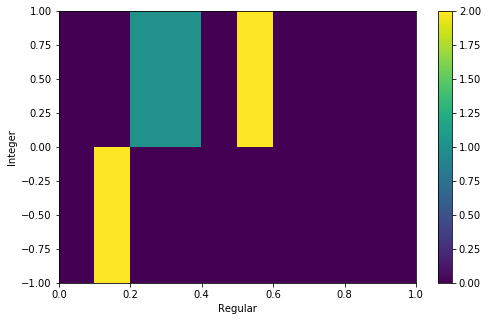

In [5]:
import numpy as np
import matplotlib.pyplot as plt

h.axes[0].metadata["title"] = "Regular"
h.axes[1].metadata["title"] = "Integer"

fig, ax = plt.subplots(figsize=(8,5))
w, x, y = h.to_numpy()
mesh = ax.pcolormesh(x, y, w.T)
ax.set_xlabel(h.axes[0].metadata["title"])
ax.set_ylabel(h.axes[1].metadata["title"])
fig.colorbar(mesh)
fig.show()

Title is not like name property, which is a unique representation of an axes, it is often used to draw plots, such as pull plot. Let's see an example of pull plot. (Note: pull plot is not the new feature of [Nino-hist](https://nino-hist.site) for axes, you can see more details about pull plot latter.)

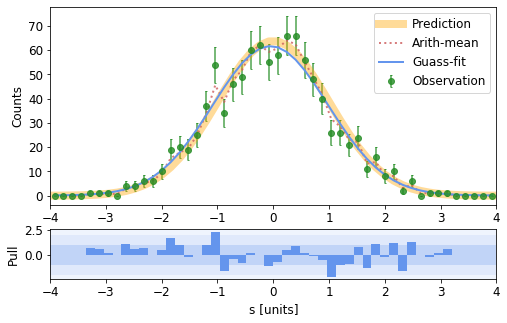

In [6]:
import hist
import numpy as np
import matplotlib.pyplot as plt


h = hist.Hist(
    hist.axis.Regular(50, -4, 4, name="S", title="s [units]", underflow=False, overflow=False)
)

data = np.random.normal(size=1_000)
h.fill(data)

def pdf(x, a=1/np.sqrt(2*np.pi), x0=0, sigma=1, offset=0):
    return a * np.exp(-(x-x0)**2/(2*sigma**2)) + offset

fig = plt.figure(figsize=(8, 5))
fig, _, _ = h.pull_plot(pdf, size="m", fig=fig)

## Bool axis

[Boost-histogram](https://boost-histogram.readthedocs.io/en/latest) doesn't support `Bool` axis directly. The often used method likes this.

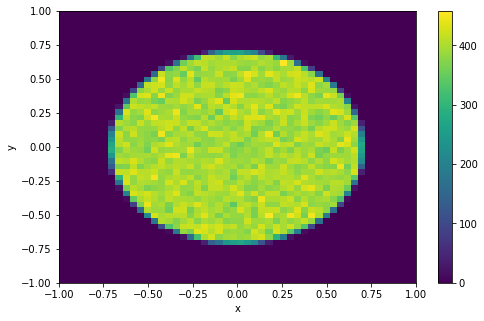

In [7]:
import boost_histogram as bh
import numpy as np
import matplotlib.pyplot as plt

h = bh.Histogram(
    bh.axis.Regular(50, -1, 1),
    bh.axis.Regular(50, -1, 1),
    bh.axis.Integer(0, 2, underflow=False, overflow=False),
)

x, y = np.random.random_sample([2, 1_000_000])*2 - 1
valid = (x**2 + y**2) < .5

h.fill(x, y, valid)
valid_only = h[:, :, bh.loc(True)]

fig, ax = plt.subplots(figsize=(8,5))
W, X, Y = valid_only.to_numpy()
mesh = ax.pcolormesh(X, Y, W.T)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(mesh)
fig.show()

The `Integer` axis is used as a `Bool` axis to screen invalid (x, y) values. [Boost-histogram](https://boost-histogram.readthedocs.io/en/latest) usually uses `Integer` or `Regular` axes to represent `Bool` axes. While in [Nino-hist](https://nino-hist.site), you can directly call `Bool` axis object, which is more explicit for coding.

In [8]:
import hist

h = hist.NamedHist(
    hist.axis.Bool(name="A", title="A [units]"),
    hist.axis.Bool(name="B", title="B [units]"),
    hist.axis.Bool(name="C", title="C [units]")
)

valid_a = [True, True, True, True]
valid_b = [True, True, False, False]
valid_c = [False, False, False, True]

h.fill(B=valid_b, A=valid_a, C=valid_c)

h.view()

array([[[0., 0.],
        [0., 0.]],

       [[1., 1.],
        [2., 0.]]])

This is a sample 3-D `NameHist` based on three `Bool` axes, having 8 bins. When filled with the lists above, 3 bins have values in their bins, i.e., (A=True, B=True, C=False), (A=True, B=False, C=False), (A=True, B=False, C=True). As shown in `h.view()`, our `Bool` works well and more convenient for interdisciplinary research. In the end of this part, let's re-implemented the figure above.

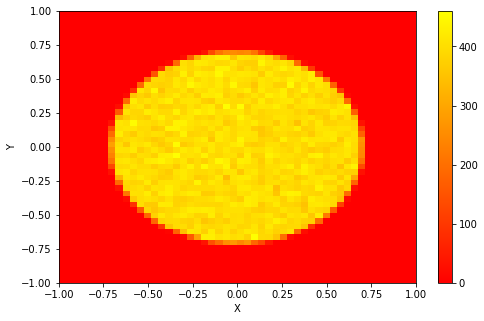

In [9]:
import boost_histogram as bh
import hist
import numpy as np
import matplotlib.pyplot as plt


h = hist.NamedHist(
    hist.axis.Regular(50, -1, 1, name="X"),
    hist.axis.Regular(50, -1, 1, name="Y"),
    hist.axis.Bool(name="V"),
)

x, y = np.random.random_sample([2, 1_000_000])*2 - 1
valid = (x**2 + y**2) < .5
h.fill(Y=y, X=x, V=valid)

valid_only = h[:, :, bh.loc(True)]

fig, ax = plt.subplots(figsize=(8,5))
W, X, Y = valid_only.to_numpy()
mesh = ax.pcolormesh(X, Y, W.T, cmap='autumn')
ax.set_xlabel('X')
ax.set_ylabel('Y')
fig.colorbar(mesh)
fig.show()